## Import Modules

In [1]:
from fbprophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [2]:
# model = Prophet(growth = 'logistic')

## Read Data

In [3]:
df = pd.read_csv('Combined_Data_for_model_final_2.csv')

In [4]:
df[df['Date'] == '2021-01-01 00:00:00']

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3


In [5]:
df_train = df.iloc[175391:]

In [6]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [9]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

C:\Users\HP\AppData\Local\Temp/ipykernel_544/99705317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Date'] = pd.to_datetime(df_train['Date'])


In [10]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


## Multivariate Forecasting

In [11]:
dfmv = df_train[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir', 'visibility']]

In [12]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,25.8,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [13]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,25.8,0.0,0.0,0.5


In [14]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [15]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [16]:
import holidays

In [17]:
# HR_holidays = holidays.country_holidays('IN', subdiv='HR')

In [18]:
# HR_holidays[2016]

In [19]:
mv_model = Prophet(growth='logistic')

In [20]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')
mv_model.add_regressor('visibility')

## We want model trained with 2021 data and tested on 2022 future data, and 2022 initial data (till May)

In [21]:
df_train['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_544/1207476209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap'] = 6000


In [22]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [24]:
df_train.drop(columns='Unnamed: 0', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_train.reset_index(inplace=True)

In [29]:
df_train.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df_train

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [51]:
df_train.rename(columns={'Date': 'ds', 'Haryana Load (MW)': 'y'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [52]:
df_train

,ds,y,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [32]:
df_test_future = pd.read_csv('processed_future_data.csv')

In [104]:
df_test_future

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0,6000
...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000


In [96]:
def preprocess_new_weather_data(rawfilename, start_date, end_date):
    df = pd.read_csv(rawfilename)
    df['Date'] = pd.to_datetime(df['datetime'])
    df = df[['Date', 'temp', 'dew', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'visibility']]
    df1 = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='15min'))
    df1.rename(columns={0:'Date'}, inplace=True)
    df2 = df1.merge(df, how='left', left_on='Date', right_on='Date')
    df2.ffill(inplace=True)
    return df2

In [97]:
df_test_2022_1 = preprocess_new_weather_data('Haryana_2022_Weather_Data/haryana 2022-01-01 to 2022-07-01.csv', '2022-01-01', '2022-07-01')

In [102]:
df_test_2022_1

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-01-01 00:00:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
1,2022-01-01 00:15:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
2,2022-01-01 00:30:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
3,2022-01-01 00:45:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
4,2022-01-01 01:00:00,9.0,8.0,93.45,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...
14491,2022-05-31 22:45:00,34.0,20.0,43.91,0.0,0.0,27.4,3.0
14492,2022-05-31 23:00:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14493,2022-05-31 23:15:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14494,2022-05-31 23:30:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3


In [99]:
df_test_2022_1.index[df_test_2022_1['Date'] == '2022-05-31 23:45:00']

Int64Index([14495], dtype='int64')

In [100]:
df_test_2022_1 = df_test_2022_1[:14496]

In [103]:
df_test_2022_1

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-01-01 00:00:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
1,2022-01-01 00:15:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
2,2022-01-01 00:30:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
3,2022-01-01 00:45:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
4,2022-01-01 01:00:00,9.0,8.0,93.45,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...
14491,2022-05-31 22:45:00,34.0,20.0,43.91,0.0,0.0,27.4,3.0
14492,2022-05-31 23:00:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14493,2022-05-31 23:15:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14494,2022-05-31 23:30:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3


## Fit model on  Datasets

In [53]:
df_train

,ds,y,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [54]:
mv_model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## Save model

In [55]:
from prophet.serialize import model_to_json, model_from_json

with open('2021_mv_model.json', 'w') as fout:
    fout.write(model_to_json(mv_model))  # Save model

with open('2021_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [56]:
# import pickle

In [57]:
# import joblib

In [58]:
# joblib.dump(mv_model, 'logistic_mv_all_model_good.pkl')

In [50]:
# saved_mv_model = joblib.load('logistic_mv_all_model_good.pkl')

In [108]:
df_test_2022_1

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-01-01 00:00:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
1,2022-01-01 00:15:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
2,2022-01-01 00:30:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
3,2022-01-01 00:45:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
4,2022-01-01 01:00:00,9.0,8.0,93.45,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...
14491,2022-05-31 22:45:00,34.0,20.0,43.91,0.0,0.0,27.4,3.0
14492,2022-05-31 23:00:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14493,2022-05-31 23:15:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3
14494,2022-05-31 23:30:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3


In [109]:
df_test_2022_1['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_544/2234069511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_2022_1['cap'] = 6000


In [116]:
# test_ds = df_test.drop(columns='y') #Use this when test data has a load column
test_ds = df_test_2022_1 #Use this when test data has no load colum

In [117]:
test_ds.rename(columns={'Date': 'ds'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [118]:
# test_ds.drop(columns='Unnamed: 0', inplace=True)

In [119]:
test_ds

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2022-01-01 00:00:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
1,2022-01-01 00:15:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
2,2022-01-01 00:30:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
3,2022-01-01 00:45:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
4,2022-01-01 01:00:00,9.0,8.0,93.45,0.0,0.0,27.4,1.0,6000
...,...,...,...,...,...,...,...,...,...
14491,2022-05-31 22:45:00,34.0,20.0,43.91,0.0,0.0,27.4,3.0,6000
14492,2022-05-31 23:00:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3,6000
14493,2022-05-31 23:15:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3,6000
14494,2022-05-31 23:30:00,32.5,23.7,59.64,0.0,354.4,28.5,2.3,6000


## Make forecast on 2022 initial dataset (till May)

In [120]:
forecast = saved_mv_model.predict(test_ds)

In [121]:
test_forecast = forecast

In [123]:
test_forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,winddir,winddir_lower,winddir_upper,windspeed,windspeed_lower,windspeed_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14491,2022-05-31 22:45:00,5997.407454,6000,5621.722668,8849.400426,5997.407245,5997.407673,1197.328087,1197.328087,1197.328087,...,-176.934638,-176.934638,-176.934638,3.920692,3.920692,3.920692,0.0,0.0,0.0,7194.735540
14492,2022-05-31 23:00:00,5997.407302,6000,6116.306452,9489.624917,5997.407094,5997.407522,1879.620606,1879.620606,1879.620606,...,226.523479,226.523479,226.523479,3.920692,3.920692,3.920692,0.0,0.0,0.0,7877.027908
14493,2022-05-31 23:15:00,5997.407150,6000,6161.780199,9516.178076,5997.406942,5997.407370,1864.447753,1864.447753,1864.447753,...,226.523479,226.523479,226.523479,3.920692,3.920692,3.920692,0.0,0.0,0.0,7861.854903
14494,2022-05-31 23:30:00,5997.406999,6000,6207.468641,9395.427680,5997.406791,5997.407218,1847.797923,1847.797923,1847.797923,...,226.523479,226.523479,226.523479,3.920692,3.920692,3.920692,0.0,0.0,0.0,7845.204921
14495,2022-05-31 23:45:00,5997.406847,6000,6264.498164,9375.511157,5997.406639,5997.407067,1829.543196,1829.543196,1829.543196,...,226.523479,226.523479,226.523479,3.920692,3.920692,3.920692,0.0,0.0,0.0,7826.950043


In [124]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01 00:00:00,3910.695593,2209.600895,5544.555426
1,2022-01-01 00:15:00,3891.936008,2243.454599,5591.922875
2,2022-01-01 00:30:00,3871.331988,2099.754250,5517.373512
3,2022-01-01 00:45:00,3849.045209,2117.345177,5487.010580
4,2022-01-01 01:00:00,3668.197991,2013.603740,5283.716828
...,...,...,...,...
14491,2022-05-31 22:45:00,7194.735540,5621.722668,8849.400426
14492,2022-05-31 23:00:00,7877.027908,6116.306452,9489.624917
14493,2022-05-31 23:15:00,7861.854903,6161.780199,9516.178076
14494,2022-05-31 23:30:00,7845.204921,6207.468641,9395.427680


## Plot Actual Load Values

In [126]:
df_actual = pd.read_csv('2022_Load_Data_till_May.csv')

In [127]:
df_actual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-01-01 00:15:00,4322.36
1,1,2022-01-01 00:30:00,4269.09
2,2,2022-01-01 00:45:00,4227.51
3,3,2022-01-01 01:00:00,4183.58
4,4,2022-01-01 01:15:00,4151.36
...,...,...,...
14251,14251,2022-05-31 22:45:00,8646.82
14252,14252,2022-05-31 23:00:00,8616.34
14253,14253,2022-05-31 23:15:00,8367.65
14254,14254,2022-05-31 23:30:00,8313.61


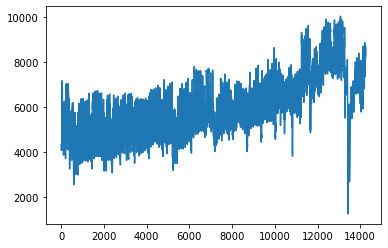

In [128]:
plt.plot(df_actual['Haryana Load (MW)'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [129]:
df_actual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-01-01 00:15:00,4322.36
1,1,2022-01-01 00:30:00,4269.09
2,2,2022-01-01 00:45:00,4227.51
3,3,2022-01-01 01:00:00,4183.58
4,4,2022-01-01 01:15:00,4151.36
...,...,...,...
14251,14251,2022-05-31 22:45:00,8646.82
14252,14252,2022-05-31 23:00:00,8616.34
14253,14253,2022-05-31 23:15:00,8367.65
14254,14254,2022-05-31 23:30:00,8313.61


In [131]:
test_forecast = test_forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

In [132]:
test_forecast

,ds,yhat,yhat_upper,yhat_lower
0,2022-01-01 00:00:00,3910.695593,5544.555426,2209.600895
1,2022-01-01 00:15:00,3891.936008,5591.922875,2243.454599
2,2022-01-01 00:30:00,3871.331988,5517.373512,2099.754250
3,2022-01-01 00:45:00,3849.045209,5487.010580,2117.345177
4,2022-01-01 01:00:00,3668.197991,5283.716828,2013.603740
...,...,...,...,...
14491,2022-05-31 22:45:00,7194.735540,8849.400426,5621.722668
14492,2022-05-31 23:00:00,7877.027908,9489.624917,6116.306452
14493,2022-05-31 23:15:00,7861.854903,9516.178076,6161.780199
14494,2022-05-31 23:30:00,7845.204921,9395.427680,6207.468641


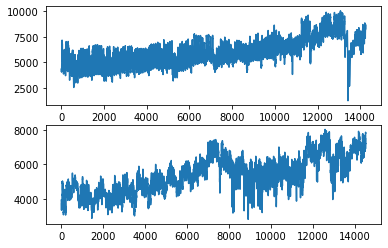

In [134]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_actual['Haryana Load (MW)'])
ax[1].plot(test_forecast['yhat'])

<function matplotlib.pyplot.show(close=None, block=None)>

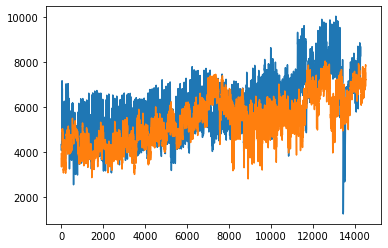

In [135]:
plt.plot(df_actual['Haryana Load (MW)'])
plt.plot(test_forecast['yhat'])
plt.show

## Getting RMSE error

In [138]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_actual['Haryana Load (MW)'][:12000], test_forecast['yhat'][:12000]))

In [139]:
rms

1290.594688284636

In [140]:
df_test['ds'][:-1]

0       2022-06-13 00:00:00
1       2022-06-13 00:15:00
2       2022-06-13 00:30:00
3       2022-06-13 00:45:00
4       2022-06-13 01:00:00
               ...         
1339    2022-06-26 22:45:00
1340    2022-06-26 23:00:00
1341    2022-06-26 23:15:00
1342    2022-06-26 23:30:00
1343    2022-06-26 23:45:00
Name: ds, Length: 1344, dtype: object

In [141]:
test_forecast['ds']

0       2022-01-01 00:00:00
1       2022-01-01 00:15:00
2       2022-01-01 00:30:00
3       2022-01-01 00:45:00
4       2022-01-01 01:00:00
                ...        
14491   2022-05-31 22:45:00
14492   2022-05-31 23:00:00
14493   2022-05-31 23:15:00
14494   2022-05-31 23:30:00
14495   2022-05-31 23:45:00
Name: ds, Length: 14496, dtype: datetime64[ns]

In [142]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

In [143]:
# df_test

In [145]:
df_actual['Haryana Load (MW)'].mean()

5966.624567901263

In [149]:
mx = df_actual['Haryana Load (MW)'].max()
mn = df_actual['Haryana Load (MW)'].min()

In [150]:
nrmse = rms/(mx - mn)

In [151]:
nrmse

0.1466774887070184

In [154]:
import sklearn
r2s = sklearn.metrics.r2_score(df_actual['Haryana Load (MW)'][:12000], test_forecast['yhat'][:12000])
r2s

-0.38582620835285875

In [155]:
sd = np.std(test_forecast['yhat'])
sd

1056.5319690272477

## Done till here. Now, you have to do the predictions for the future 2022 data

In [157]:
fdf = pd.read_csv('processed_future_data.csv')

In [158]:
fdf

,Unnamed: 0,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...
1340,1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [160]:
fdf.rename(columns={'Date' : 'ds'}, inplace=True)

In [162]:
fdf.drop(columns='Unnamed: 0', inplace=True)

In [163]:
fdf

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [165]:
fdf['cap'] = 6000

In [166]:
fdf

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0,6000
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0,6000
...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1,6000


In [167]:
fpredictions = saved_mv_model.predict(fdf)

In [169]:
fpredictions = fpredictions[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

In [170]:
fpredictions

,ds,yhat,yhat_upper,yhat_lower
0,2022-06-13 00:00:00,6178.962830,7932.188054,4517.923572
1,2022-06-13 00:15:00,6162.676822,7738.900569,4546.226408
2,2022-06-13 00:30:00,6144.730484,7862.220811,4409.166306
3,2022-06-13 00:45:00,6125.285899,7736.685330,4494.500361
4,2022-06-13 01:00:00,6201.604384,7770.265856,4479.533486
...,...,...,...,...
1340,2022-06-26 23:00:00,7388.599065,9103.372133,5834.825096
1341,2022-06-26 23:15:00,7378.558544,9016.777689,5767.748409
1342,2022-06-26 23:30:00,7367.127936,9070.732260,5751.546179
1343,2022-06-26 23:45:00,7354.175637,9029.115084,5677.223536


In [173]:
factual = pd.read_csv('future_actual_load.csv')

In [182]:
fpredictions.iloc[96]

ds            2022-06-14 00:00:00
yhat                  7505.686278
yhat_upper            9243.040115
yhat_lower            5753.404529
Name: 96, dtype: object

In [184]:
fpredictions.iloc[7*96  - 1]

ds            2022-06-19 23:45:00
yhat                  6430.603844
yhat_upper            8164.096143
yhat_lower            4763.948285
Name: 671, dtype: object

In [186]:
fpredictions = fpredictions[96:7*96]

In [189]:
fpredictions.reset_index(inplace=True)

In [192]:
fpredictions.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [193]:
fpredictions

,ds,yhat,yhat_upper,yhat_lower
0,2022-06-14 00:00:00,7505.686278,9243.040115,5753.404529
1,2022-06-14 00:15:00,7488.370141,9144.982542,5795.613274
2,2022-06-14 00:30:00,7469.115331,9111.284493,5788.777006
3,2022-06-14 00:45:00,7448.086001,9195.584875,5908.258464
4,2022-06-14 01:00:00,7420.985915,9143.118653,5807.240851
...,...,...,...,...
571,2022-06-19 22:45:00,6559.265512,8301.651924,4911.816495
572,2022-06-19 23:00:00,6465.027252,8202.128209,4788.672048
573,2022-06-19 23:15:00,6454.986738,8013.839442,4819.854765
574,2022-06-19 23:30:00,6443.556137,8118.798244,4678.313568


In [194]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [195]:
fpredictions[1:]

,ds,yhat,yhat_upper,yhat_lower
1,2022-06-14 00:15:00,7488.370141,9144.982542,5795.613274
2,2022-06-14 00:30:00,7469.115331,9111.284493,5788.777006
3,2022-06-14 00:45:00,7448.086001,9195.584875,5908.258464
4,2022-06-14 01:00:00,7420.985915,9143.118653,5807.240851
5,2022-06-14 01:15:00,7397.501352,9061.572509,5753.083400
...,...,...,...,...
571,2022-06-19 22:45:00,6559.265512,8301.651924,4911.816495
572,2022-06-19 23:00:00,6465.027252,8202.128209,4788.672048
573,2022-06-19 23:15:00,6454.986738,8013.839442,4819.854765
574,2022-06-19 23:30:00,6443.556137,8118.798244,4678.313568


In [200]:
%matplotlib inline

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


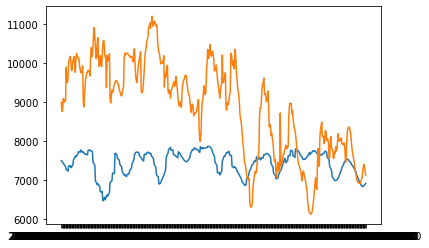

In [203]:
plt.plot(factual['Date'][:500], fpredictions['yhat'][:500])
plt.plot(factual['Date'][:500], factual['Haryana Load (MW)'][:500])

## Create future Dataframes using MA for data that is not yet in the system

In [308]:
df_test.tail(7)

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210424,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210425,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [309]:
df_last_7 = df_test.tail(7)
df_last_7.reset_index(inplace=True)
df_last_7

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,210424,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
1,210425,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
2,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
3,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
4,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
5,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
6,210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [310]:
# df_last_7['temp'] = df_last_7['temp'].rolling(window=7, min_periods=1).mean()

In [311]:
df_last_7.rename(columns={'ds':'Date'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [319]:
df_added = pd.DataFrame(df_last_7['Date'].append(pd.Series(pd.date_range('2022-01-01 00:00:00', '2022-01-31 23:45:00', freq='15min'))))

In [320]:
df_added.rename(columns={0:'Date'}, inplace=True)

In [331]:
df_added

,Date
0,2021-12-31 22:15:00
1,2021-12-31 22:30:00
2,2021-12-31 22:45:00
3,2021-12-31 23:00:00
4,2021-12-31 23:15:00
...,...
2971,2022-01-31 22:45:00
2972,2022-01-31 23:00:00
2973,2022-01-31 23:15:00
2974,2022-01-31 23:30:00


In [332]:
df_added_good = df_added.merge(df_last_7, left_on = 'Date', right_on='Date', how = 'left')

In [333]:
df_added_good.drop(columns=['index'], inplace=True)

In [334]:
df_added_good

,Date,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
1,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
2,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
3,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
4,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...
2978,2022-01-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,2022-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2980,2022-01-31 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,2022-01-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
df_added_good.to_csv('Jan_22_future_DFs_for_MA_Analysis.csv')

In [328]:
df_added_good['temp'] = df_added_good['temp'].rolling(window=7, min_periods=1).mean()

In [329]:
df_added_good

,Date,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2021-12-31 22:15:00,4907.61,10.00,8.0,87.38,27.4,0.0,0.0,2.0
1,2021-12-31 22:30:00,4847.97,10.00,8.0,87.38,27.4,0.0,0.0,2.0
2,2021-12-31 22:45:00,4712.55,10.00,8.0,87.38,27.4,0.0,0.0,2.0
3,2021-12-31 23:00:00,4649.58,9.80,7.3,88.04,28.5,0.0,0.0,1.3
4,2021-12-31 23:15:00,4571.39,9.68,7.3,88.04,28.5,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...
2978,2022-01-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,2022-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2980,2022-01-31 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,2022-01-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
df_test.to_csv('test_data.csv')

In [318]:
future = saved_mv_model.make_future_dataframe(periods=96*(365), freq='15min')

In [177]:
future

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00
...,...
133214,2021-10-19 15:30:00
133215,2021-10-19 15:45:00
133216,2021-10-19 16:00:00
133217,2021-10-19 16:15:00


In [178]:
future.tail()

,ds
133214,2021-10-19 15:30:00
133215,2021-10-19 15:45:00
133216,2021-10-19 16:00:00
133217,2021-10-19 16:15:00
133218,2021-10-19 16:30:00


## Make future forecast

In [180]:
saved_mv_model

In [179]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ValueError: Regressor 'temp' missing from dataframe

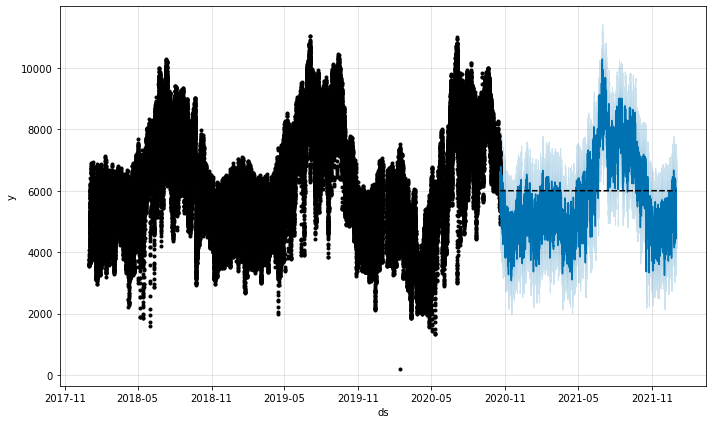

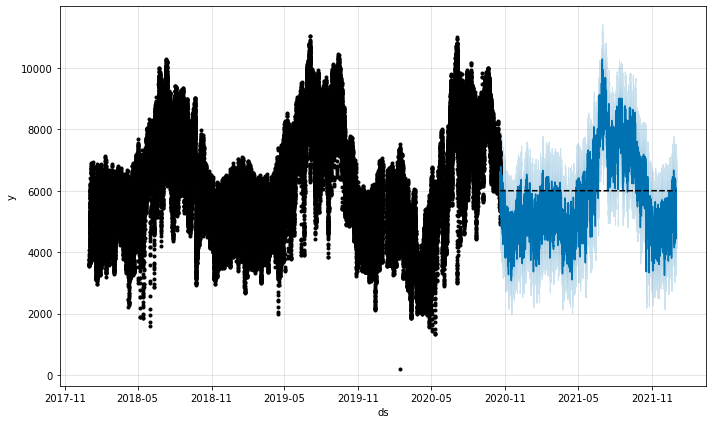

In [106]:
saved_mv_model.plot(forecast)